In [1]:
import pandas as pd
import numpy as np 

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('time_series_covid19_deaths_global.csv')
df = df.rename(columns={'Country/Region': 'Pais'})
df = df.groupby('Pais').agg(np.sum)
# df = df.sort_values('5/11/20', ascending=False)
# df[df['Province/State'].notnull()][:50]
# df[df['Country/Region'] == 'France']
df = df.iloc[:,2:]
# df

In [2]:
tam = len(df.columns)
df1 = df.iloc[:,1:tam]
df1.columns = list(range(0,tam-1))
df2 = df.iloc[:,0:tam-1]
df2.columns = list(range(0,tam-1))
df3 = df1 - df2
df3.columns = df.columns[1:]
# df3.head(10)

In [3]:
df4 = df3.copy()
for x in df3.index:
    # print(x)
    for c in range(0,tam):
        # print(c)
        if c >= 7:
            # print(f'{df.columns[c]:<15} {df3.loc[x][c-7:c].mean():10,.0f}')
            df4.at[x, df.columns[c]] = df3.loc[x][c-7:c].mean()
# df4 = df4.sort_values('5/11/20', ascending=False)
# df4.iloc[:10,-14:]

In [4]:
q_pico = []
d_pico = []
for x in df4.index:
    # print(f'{x:<20} {df4.loc[x].max():5} {df4.columns[df4.loc[x].argmax()]}')
    q_pico.append(df4.loc[x].max())
    d_pico.append(df4.columns[df4.loc[x].argmax()])

In [5]:
df5 = pd.DataFrame(df4.iloc[:,-1], index=df4.index)
df5['Q_Pico'] = pd.Series(q_pico, index=df4.index)
df5['D_Pico'] = pd.Series(d_pico, index=df4.index)
df5.columns = ['Ult_7_Dias', 'Pico', 'Dia_do_Pico']
df5['Delta %'] = df5['Ult_7_Dias'] / df5['Pico'] - 1
df5 = df5.sort_values('Ult_7_Dias', ascending=False)
df5.head(10)

,Ult_7_Dias,Pico,Dia_do_Pico,Delta %
Pais,,,,
Brazil,1013,1038,6/4/20,-0.02
US,860,2201,4/18/20,-0.61
Mexico,533,536,6/5/20,-0.01
United Kingdom,298,944,4/14/20,-0.68
India,251,251,6/6/20,0.00
Russia,166,177,6/3/20,-0.06
Peru,132,150,5/31/20,-0.12
Canada,98,175,5/7/20,-0.44
Chile,77,77,6/6/20,0.00


### Número de óbtidos por COVID-19
    Ranking 10 maiores países - considerando últ 7 dias
    Valores apresentam média diária de óbitos em 7 dias
    Atualizado com dados até 06/06/2020
    Data no formato mm/dd/aa
    Fonte: CSSE at Johns Hopkins University
    https://github.com/CSSEGISandData
    

In [6]:
q_pico_tot = df4.sum().max()
d_pico_tot = df4.sum().index[df4.sum().argmax()]
ult_7_dias_tot = df4.sum()[-1]
print('Data Pico Mundial: ', d_pico_tot)
print('Óbitos Pico Mundial: ', q_pico_tot)
print('Últimos 7 das: ', ult_7_dias_tot)
print(f'Delta {ult_7_dias_tot / q_pico_tot -1:.2f}')

Data Pico Mundial:  4/18/20
Óbitos Pico Mundial:  6964
Últimos 7 das:  4326
Delta -0.38


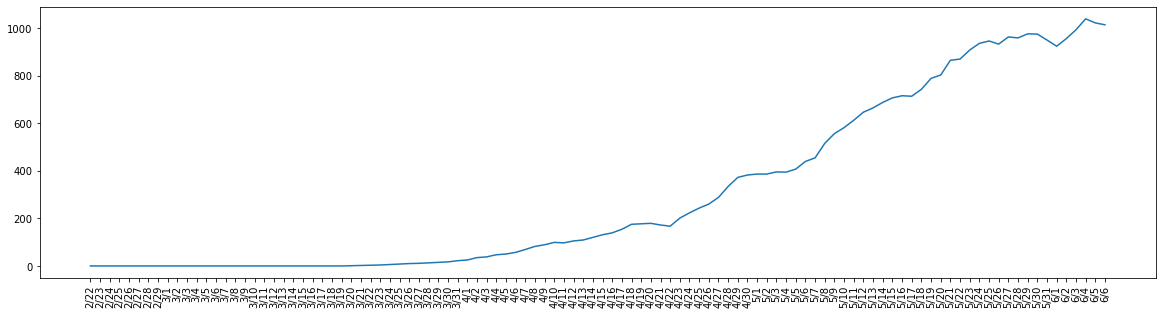

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_plt = df4.loc['Brazil'][30:]
# dates = pd.date_range('29-03-2020', periods=len(df_plt))

dates = []
for x in df_plt.index:
    if type(x) == str:
        pos = x.rfind('/')
        dates.append(x[:pos])
    else:
        dates.append(str(x.month) + '-' + str(x.day))
df_plt.index = dates
plt.plot(df_plt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

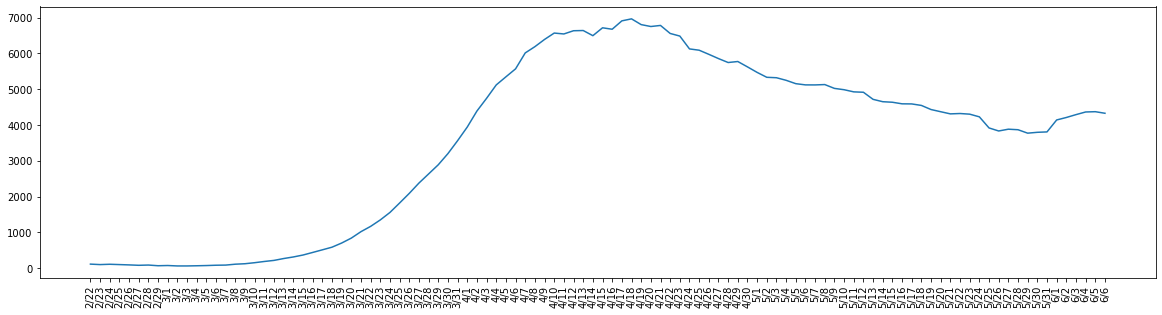

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_plt = df4.sum()[30:]
# dates = pd.date_range('29-03-2020', periods=len(df_plt))

dates = []
for x in df_plt.index:
    if type(x) == str:
        pos = x.rfind('/')
        dates.append(x[:pos])
    else:
        dates.append(str(x.month) + '-' + str(x.day))
df_plt.index = dates
plt.plot(df_plt)
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

In [28]:
df4.T.sum().sort_values(ascending=False)[:20]

Pais
US                107107
United Kingdom     39656
Italy              33572
Brazil             32531
France             28949
Spain              27096
Mexico             11633
Belgium             9487
Germany             8565
Iran                7961
Canada              7567
India               6093
Netherlands         5961
Russia              5169
Peru                4844
China               4663
Turkey              4572
Sweden              4488
Ecuador             3430
Switzerland         1879
dtype: int64

In [24]:
df4.T['Brazil'].tail(20)

5/18/20     742
5/19/20     788
5/20/20     802
5/21/20     864
5/22/20     869
5/23/20     907
5/24/20     935
5/25/20     945
5/26/20     932
5/27/20     962
5/28/20     958
5/29/20     975
5/30/20     974
5/31/20     949
6/1/20      923
6/2/20      955
6/3/20      992
6/4/20     1038
6/5/20     1021
6/6/20     1013
Name: Brazil, dtype: int64